<a href="https://www.kaggle.com/code/mshsss/binance-data-exploration-week-6?scriptVersionId=99346255" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/binance-full-history/WAVES-USDT.parquet
/kaggle/input/binance-full-history/RLC-BNB.parquet
/kaggle/input/binance-full-history/AE-BTC.parquet
/kaggle/input/binance-full-history/BTC-GBP.parquet
/kaggle/input/binance-full-history/RVN-BNB.parquet
/kaggle/input/binance-full-history/DOTDOWN-USDT.parquet
/kaggle/input/binance-full-history/MATIC-BUSD.parquet
/kaggle/input/binance-full-history/HIVE-BTC.parquet
/kaggle/input/binance-full-history/DOT-BUSD.parquet
/kaggle/input/binance-full-history/XRP-USDC.parquet
/kaggle/input/binance-full-history/KAVA-USDT.parquet
/kaggle/input/binance-full-history/AXS-USDT.parquet
/kaggle/input/binance-full-history/STX-BTC.parquet
/kaggle/input/binance-full-history/XRP-PAX.parquet
/kaggle/input/binance-full-history/SHIB-BUSD.parquet
/kaggle/input/binance-full-history/CTXC-USDT.parquet
/kaggle/input/binance-full-history/TRX-USDT.parquet
/kaggle/input/binance-full-history/ANKR-BTC.parquet
/kaggle/input/binance-full-history/DOT-TRY.parquet
/kaggle/i

2. Analyze data 
* Using publiclly available binance data that is already on kaggle
* Data is slightly outdated,only up to 12/3/2022

In [2]:
df = pd.read_parquet('/kaggle/input/binance-full-history/BTC-USDT.parquet')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2394622 entries, 2017-08-17 04:00:00 to 2022-03-12 23:59:00
Data columns (total 9 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   open                          float32
 1   high                          float32
 2   low                           float32
 3   close                         float32
 4   volume                        float32
 5   quote_asset_volume            float32
 6   number_of_trades              uint16 
 7   taker_buy_base_asset_volume   float32
 8   taker_buy_quote_asset_volume  float32
dtypes: float32(8), uint16(1)
memory usage: 95.9 MB


,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
open_time,,,,,,,,,
2017-08-17 04:00:00,4261.479980,4261.479980,4261.479980,4261.479980,1.775183,7564.906738,3,0.075183,320.390839
2017-08-17 04:01:00,4261.479980,4261.479980,4261.479980,4261.479980,0.000000,0.000000,0,0.000000,0.000000
2017-08-17 04:02:00,4280.560059,4280.560059,4280.560059,4280.560059,0.261074,1117.542969,2,0.261074,1117.542969
2017-08-17 04:03:00,4261.479980,4261.479980,4261.479980,4261.479980,0.012008,51.171852,3,0.012008,51.171852
2017-08-17 04:04:00,4261.479980,4261.479980,4261.479980,4261.479980,0.140796,599.999329,1,0.140796,599.999329


Drop values before 2022

In [3]:
df = df[~(df.index < '2022-01-01')]
df.head()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
open_time,,,,,,,,,
2022-01-01 00:00:00,46216.929688,46271.078125,46208.371094,46250.000000,40.575741,1875978.500,796,27.26086,1260270.375
2022-01-01 00:01:00,46250.000000,46344.230469,46234.390625,46312.761719,42.381062,1961908.250,973,28.92522,1339049.500
2022-01-01 00:02:00,46312.761719,46381.691406,46292.750000,46368.730469,51.299549,2377414.000,1238,22.74786,1054134.625
2022-01-01 00:03:00,46368.730469,46391.488281,46314.261719,46331.078125,30.458941,1412003.875,953,16.12179,747308.625
2022-01-01 00:04:00,46331.070312,46336.101562,46300.000000,46321.339844,20.960291,971009.875,591,11.49082,532319.875


Get daily moving average on graph

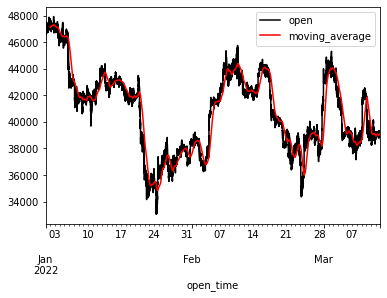

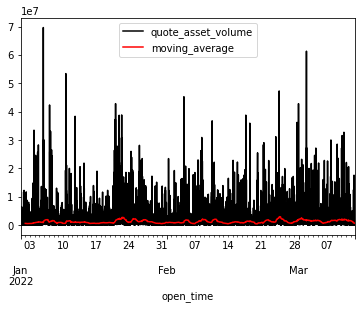

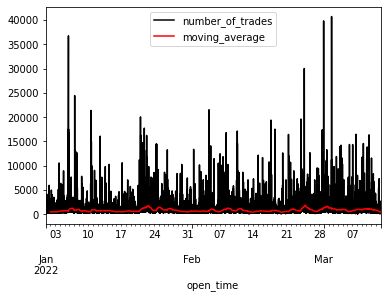

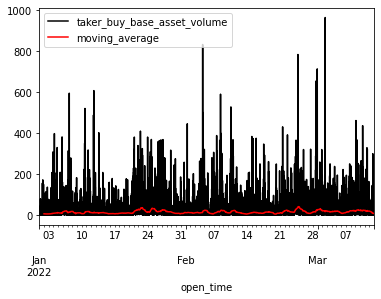

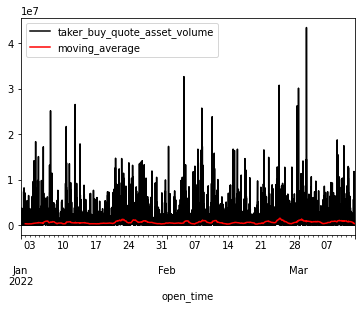

In [4]:
for i in ["open","quote_asset_volume","number_of_trades","taker_buy_base_asset_volume","taker_buy_quote_asset_volume"]:
    window = 60 * 24
    df['moving_average'] = df[i].rolling(window).mean()
    df[[i, 'moving_average']].plot(title='', color=['black', 'red', 'green'])

There seems to be periods of spikes in trade volume. This might be due to whales/finacial institutions 

**3) Analyse volume of every crypto currency**
* Take top 10 in terms of trading volume for future reference

In [5]:
volume_values={}
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        df = pd.read_parquet(os.path.join(dirname, filename))
        #Drop values
        df = df[~(df.index < '2022-01-01')]
        #Get daily average asset volume
        if len(df["quote_asset_volume"]) !=0:
            avg=sum(df["quote_asset_volume"])/len(df["quote_asset_volume"])
        else:
            avg=0
        #append to dictionary storing values
        volume_values[os.path.splitext(filename)[0]]=avg


In [6]:
volume_values

{'WAVES-USDT': 25222.070510786372,
 'RLC-BNB': 0,
 'AE-BTC': 0,
 'BTC-GBP': 5392.420191436001,
 'RVN-BNB': 0,
 'DOTDOWN-USDT': 3317.7565539908155,
 'MATIC-BUSD': 24117.10481463452,
 'HIVE-BTC': 0.012834204316867017,
 'DOT-BUSD': 17039.20735377784,
 'XRP-USDC': 2254.7702198296797,
 'KAVA-USDT': 18509.36528843147,
 'AXS-USDT': 39656.03748449908,
 'STX-BTC': 0.027127770944336264,
 'XRP-PAX': 0,
 'SHIB-BUSD': 42113.18543782927,
 'CTXC-USDT': 4785.43899381182,
 'TRX-USDT': 71959.7716625342,
 'ANKR-BTC': 0.018581268315012264,
 'DOT-TRY': 9192.873154820492,
 'MBL-USDT': 3441.4610742114373,
 'WAN-USDT': 2154.155997568657,
 'MANA-ETH': 0.2703956302142996,
 'LTC-BTC': 0.22950904361166974,
 'REN-USDT': 4784.423880090888,
 'ONT-USDT': 5409.438544490956,
 'ZEN-USDT': 5683.032004843205,
 'BNB-EUR': 4069.1142490704974,
 'AST-ETH': 0,
 'AAVEDOWN-USDT': 0,
 'AVAX-TRY': 145178.0161942836,
 'BTC-TUSD': 1638.1614042622152,
 'NCASH-BTC': 0,
 'FIRO-USDT': 1267.5465933372802,
 'DEGO-USDT': 1500.723570786219,

In [7]:
graph_values=[(x,y) for x,y in volume_values.items()]
graph_values.sort(key=lambda x:x[1],reverse=True)
graph_values[:10]


[('USDT-BIDR', 73290622.21911414),
 ('BUSD-BIDR', 28069379.77748292),
 ('ETH-BIDR', 23450968.091296177),
 ('BTC-BIDR', 20988113.43048879),
 ('BNB-BIDR', 12464169.2919983),
 ('TKO-BIDR', 11617613.703535479),
 ('USDT-IDRT', 3257104.662050078),
 ('DOT-BIDR', 2272767.9175460767),
 ('ZIL-BIDR', 1458093.2403211806),
 ('BTC-USDT', 1250701.1116773721)]

Top ten trading has 3x usdt

<BarContainer object of 10 artists>

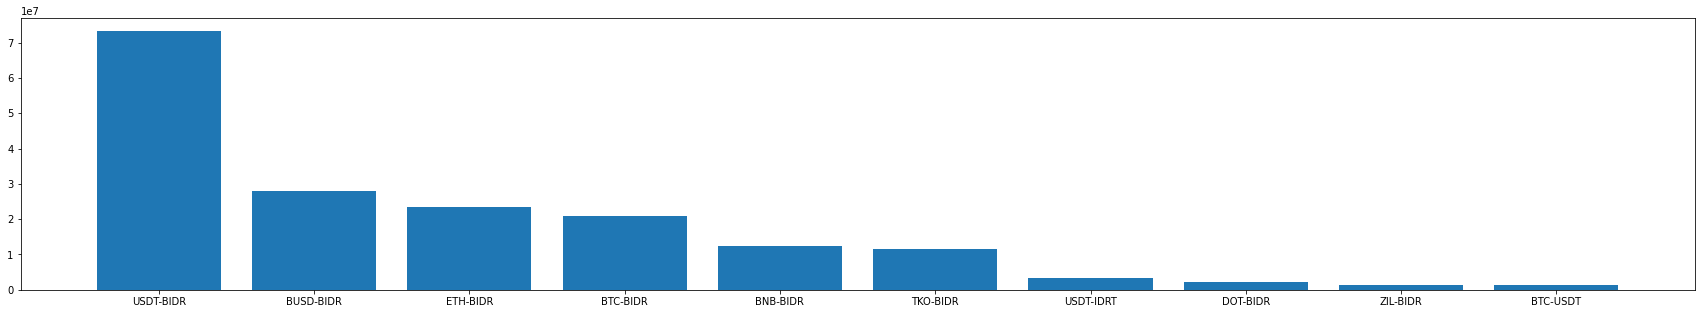

In [8]:
x=[i[0] for i in graph_values[:10]]
y=[i[1] for i in graph_values[:10]]
plt.subplots(figsize=(30,5))
plt.bar(x,y)